In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [2]:
api_key = ''
symbol = 'BTC/USD'
interval = '5min'
order = 'asc'
start_date = '2024-10-1 00:00:00'
end_date = '2024-11-18 00:00:00'

api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'


In [3]:
data = requests.get(api_url).json()
data = pd.DataFrame(data['values'])
data

,datetime,open,high,low,close
0,2024-10-31 15:15:00,70729.69,70961.09,70707.27,70874.53
1,2024-10-31 15:20:00,70874.53,71009.9,70813.64,70956.22
2,2024-10-31 15:25:00,70956.21,70958.17,70823.97,70825.99
3,2024-10-31 15:30:00,70825.99,70884.72,70705.33,70810.83
4,2024-10-31 15:35:00,70810.83,70831.25,70720.07,70720.99
...,...,...,...,...,...
4995,2024-11-17 23:40:00,89656.05,89725.61,89650.02,89724.47
4996,2024-11-17 23:45:00,89713.88,89838.21,89668,89808.42
4997,2024-11-17 23:50:00,89807.62,89895.81,89771.53,89775.6
4998,2024-11-17 23:55:00,89787.17,89894.25,89787.17,89886.69


In [4]:
scalar = MinMaxScaler(feature_range= (0, 1))
scaled_data = scalar.fit_transform(data['close'].values.reshape(-1, 1))
len(scaled_data)

5000

In [5]:
time_train = 24
time_predict = 12

x_train = []
y_train = []

for i in range(time_train, len(scaled_data)-time_predict):
    x_train.append(scaled_data[i - time_train:i, 0])
    y_train.append(scaled_data[i + time_predict, 0])


x_train = np.array(x_train)
y_train = np.array(y_train)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4964, 24, 1)

In [7]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1], 1), activation= 'relu', return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation= 'relu', return_sequences= True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss = 'mse', optimizer = 'adam', metrics= ['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs = 10, verbose = 1)


Epoch 1/10
156/156 [==============================] - 12s 55ms/step - loss: 0.0191 - accuracy: 4.0290e-04
Epoch 2/10
156/156 [==============================] - 9s 58ms/step - loss: 0.0019 - accuracy: 4.0290e-04
Epoch 3/10
156/156 [==============================] - 9s 57ms/step - loss: 0.0017 - accuracy: 4.0290e-04
Epoch 4/10
156/156 [==============================] - 9s 56ms/step - loss: 0.0017 - accuracy: 4.0290e-04
Epoch 5/10
156/156 [==============================] - 9s 56ms/step - loss: 0.0017 - accuracy: 4.0290e-04
Epoch 6/10
156/156 [==============================] - 9s 57ms/step - loss: 0.0017 - accuracy: 4.0290e-04
Epoch 7/10
156/156 [==============================] - 9s 59ms/step - loss: 0.0016 - accuracy: 4.0290e-04
Epoch 8/10
156/156 [==============================] - 9s 58ms/step - loss: 0.0016 - accuracy: 4.0290e-04
Epoch 9/10
156/156 [==============================] - 9s 56ms/step - loss: 0.0015 - accuracy: 4.0290e-04
Epoch 10/10
156/156 [==============================] -

In [11]:
start_date = '2024-11-18 00:00:00'
end_date = '2024-11-23 00:00:00'

api_url_hat = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'

In [12]:
test_data = requests.get(api_url_hat).json()
test_data = pd.DataFrame(test_data['values'])
test_data

,datetime,open,high,low,close
0,2024-11-18 00:00:00,89877.11,89900,89727.78,89849.58
1,2024-11-18 00:05:00,89855,89985.47,89834.34,89890.68
2,2024-11-18 00:10:00,89890.67,89890.68,89640.83,89819.16
3,2024-11-18 00:15:00,89820.82,89867.4,89695.1,89767.08
4,2024-11-18 00:20:00,89771.12,89817.44,89672.04,89770.27
...,...,...,...,...,...
1436,2024-11-22 23:40:00,98899.93,98968.32,98857.73,98901.85
1437,2024-11-22 23:45:00,98901.86,99044.87,98901.85,99019.37
1438,2024-11-22 23:50:00,99019.36,99028.97,98927.49,98972.13
1439,2024-11-22 23:55:00,98972.12,99069.69,98972.12,99024.03


In [13]:
BCprices = pd.to_numeric(test_data['close'], errors= 'coerce').values
scaled_test_data = test_data['close'].values.reshape(-1, 1)
scaled_test_data = scalar.fit_transform(scaled_test_data)
BCprices.shape


(1441,)

In [14]:
x_test = []

for x in range (time_train, len(scaled_test_data)):
    x_test.append(scaled_test_data[x - time_train:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape


(1417, 24, 1)

In [15]:
predicted_price = model.predict(x_test)
predicted_price = scalar.inverse_transform(predicted_price)
predicted_price

45/45 [==============================] - 1s 18ms/step


array([[90205.91],
       [90266.06],
       [90327.12],
       ...,
       [99017.32],
       [99008.5 ],
       [99000.54]], dtype=float32)

In [16]:
predicted_price = np.insert(predicted_price, 0, np.repeat(np.nan, time_train))

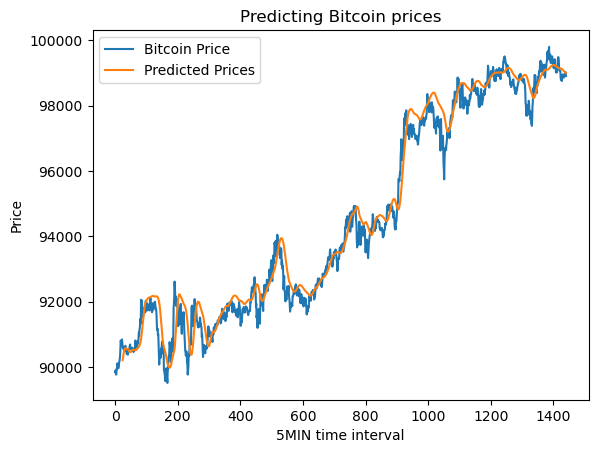

In [17]:
plt.plot(BCprices, label= 'Bitcoin Price')
plt.plot(predicted_price, label= 'Predicted Prices')
plt.title('Predicting Bitcoin prices')
plt.xlabel('5MIN time interval')
plt.ylabel('Price')
plt.legend()

